<h1 style="font-weight: bold;">Titanic Survival With R</h1>


## 1) **Import libraries**

load the libraries to be used in the notebook


In [11]:
library(tidyverse)
library(tidymodels)

## 2) **Setting notebook**


In [12]:
options()

$add.smooth
[1] TRUE

$ambiguousMethodSelection
function (cond) 
NULL
<environment: R_EmptyEnv>

$bitmapType
[1] "cairo"

$browser
[1] ""

$browserNLdisabled
[1] FALSE

$callr.condition_handler_cli_message
function (msg) 
{
    custom_handler <- getOption("cli.default_handler")
    if (is.function(custom_handler)) {
        custom_handler(msg)
    }
    else {
        cli_server_default(msg)
    }
}
<bytecode: 0x30011dea68>
<environment: namespace:cli>

$catch.script.errors
[1] FALSE

$CBoundsCheck
[1] FALSE

$check.bounds
[1] FALSE

$citation.bibtex.max
[1] 1

$continue
[1] "+ "

$contrasts
        unordered           ordered 
"contr.treatment"      "contr.poly" 

$crayon.enabled
[1] TRUE

$datatable.alloccol
[1] 1024

$datatable.allow.cartesian
[1] FALSE

$datatable.auto.index
[1] TRUE

$datatable.dfdispatchwarn
[1] TRUE

$datatable.optimize
[1] Inf

$datatable.print.class
[1] TRUE

$datatable.print.colnames
[1] "auto"

$datatable.print.keys
[1] TRUE

$datatable.print.nrows
[1] 100



## 3) **Load the data**

<p>Load the csv file to pandas dataframe</p>


In [13]:
dir.exists("./data")

[1] TRUE

In [14]:
folder_path <- NULL

if (dir.exists("data/")) {
    folder_path <- "data"
} else {
    stop("Unable find the data")
}


train_path = file.path(folder_path, "train.csv")
test_path = file.path(folder_path, "test.csv")

In [15]:
# Set the PassengerId column as index column.
index_col <- 'PassengerId'

# Load the train and test dataframe.
train_df = read_csv(train_path)
test_df = read_csv(test_path)

Rows: 891 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Name, Sex, Ticket, Cabin, Embarked
dbl (7): PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 418 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Name, Sex, Ticket, Cabin, Embarked
dbl (6): PassengerId, Pclass, Age, SibSp, Parch, Fare

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## 4) **Data statistics**

<p>Analyse train and test dataframe</p>


### i) Rows in train data

<p>View train dataframe top and bottom rows</p>


In [16]:
# First five rows in train data.
train_df %>% head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


In [17]:
# First five rows in test data.
train_df %>% tail()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,NA,Q
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,NA,S
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,NA,S
890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,NA,Q


### ii) Rows in test data

<p>View test dataframe top and bottom rows</p>


In [18]:
# First five rows in test data.
test_df %>% head()

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NA,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NA,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NA,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NA,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NA,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NA,S


In [19]:
# Last five rows in test data
test_df %>% tail()

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NA,S
1305,3,"Spector, Mr. Woolf",male,NA,0,0,A.5. 3236,8.0500,NA,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NA,S
1308,3,"Ware, Mr. Frederick",male,NA,0,0,359309,8.0500,NA,S
1309,3,"Peter, Master. Michael J",male,NA,1,1,2668,22.3583,NA,C


### iii) Data description

<p>Get the know the datasets</p>


#### a) Data shapes


In [24]:
# Train dataframe shape.
train_shape <- train_df %>% dim()
display_shape <- sprintf("Train shape:\n\trows: %s\n\tcolumns: %s", train_shape[1], train_shape[2])
cat(display_shape)

Train shape:
	rows: 891
	columns: 12

In [25]:
# Test dataframe shape.
test_shape = test_df %>% dim()
display_shape <- sprintf("Test shape:\n\trows: %s\n\tcolumns: %s", test_shape[1], test_shape[2])
cat(display_shape)

Test shape:
	rows: 418
	columns: 11

#### b) Data column names


In [27]:
columns <- train_df %>% colnames()
cat(columns)

PassengerId Survived Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked

In [ ]:
train_df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

#### i) Converting train data frame low unique values


In [ ]:
def convert_low_unique_value_to_str(data: pd.DataFrame) -> pd.DataFrame:
    """
    Convert low unique values columns to string.

    Args
    ----
    data: Dataframe to change low unique columns.

    :return: Dataframe.
    """
    # Change Survived, Pclass, SibSp and Parch to string data type for analysis.
    data_copy = data.copy()

    # Loop over the column name to turn to object
    for col in ("Survived", "Pclass", "SibSp", "Parch"):
        data_copy[col] = data_copy[col].astype(str)

    return data_copy


ana_train_data = convert_low_unique_value_to_str(train_df)
ana_train_data.dtypes

Survived     object
Pclass       object
Name         object
Sex          object
Age         float64
SibSp        object
Parch        object
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

#### c) Data information


In [ ]:
# Train data information.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
# Test data information
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


#### d) Describing the data


In [ ]:
# Train dataframe description
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<p style="font-weight: bold; font-style: italic;">Description of numerical columns in train data</p>


In [ ]:

ana_train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<p style="font-weight: bold; font-style: italic;">Description of categorical columns in train data</p>


In [ ]:
ana_train_data.describe(exclude=float).T

,count,unique,top,freq
Survived,891,2,0,549
Pclass,891,3,3,491
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
SibSp,891,7,0,608
Parch,891,7,0,678
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


## 5) **Data split**

<p>Separate target from the data and then split the data into train and validation</p>


In [ ]:
# Target name.
target_name = "Survived"

# Separating target column from the feature columns.
X = train_df.copy()
y = X.pop(target_name).values.reshape(-1, 1)

# View the shape X and y.
print(f'''
X shape: {X.shape}
y shape: {y.shape}
''')


X shape: (891, 10)
y shape: (891, 1)



In [ ]:
# 25 percent will be for test data.
test_size = 0.25

# 🪓 Splitting data into train and validation data.
train_x, valid_x, train_y, valid_y = train_test_split(
    X, y, test_size=test_size)

# View the shape of the data.
print(f'''
train_x shape: {train_x.shape}
train_y shape: {train_y.shape}
valid_x shape: {valid_x.shape}
valid_y shape: {valid_y.shape}
''')


train_x shape: (668, 10)
train_y shape: (668, 1)
valid_x shape: (223, 10)
valid_y shape: (223, 1)



## 6) **Data cleaning**

<p>Modifying or removing data that is inaccurate, duplicate, incomplete, incorrectly formatted, or corrupted</p>


### i) Check the missing values (NaN)

<p>Search for missing value in the dataframes</p>


In [ ]:
def check_n_nan(data: pd.DataFrame, only_nan: bool = True) -> pd.DataFrame:
    """
    Represents the summary of missing data in the
    data frame.

    Parameters:
    ----------
    data: A data frame to check for missing data.

    return: A dataframe with number of missing value (NaN) and the percentage.
    """
    # Compute the total NaN for each column.
    total_nan = data.isna().sum()

    if only_nan:
        total_nan = total_nan[total_nan > 0]

    # Columns
    column_names = total_nan.index

    # Compute the percentage of missing data.
    percentage = (((total_nan / data.shape[0]) * 100)
                  .round(2)
                  .astype(str)
                  .map(lambda x: x + '%')
                  )

    return pd.DataFrame({
        'columns': column_names,
        'total_nan': total_nan,
        'percent_nan': percentage
    }).reset_index(drop=True)

In [ ]:
def plot_nan(data: pd.DataFrame, name: str | None = None, only_nan: bool = True, use_percent=False) -> None:
    nan_df = check_n_nan(data, only_nan)
    nan_df['percent_nan'] = nan_df['percent_nan'].str.replace(
        '%', '').astype(float).round().astype(int)

    radius = 5
    y_name = 'percent_nan' if use_percent else 'total_nan'
    startup_title = 'Percentage' if use_percent else 'Number'
    y_title = f'{startup_title} of missing values'
    y_name = alt.Y(y_name).title(y_title)
    name = name if name else 'a dataset'
    title = f'{startup_title} Of Missing values In {name.title()}'
    subtitle = f'A chart represents missing data in {name}'

    base = alt.Chart(
        nan_df,
        title=alt.Title(
            title,
            subtitle=subtitle,
            anchor='start',
        )
    ).mark_bar(
        cornerRadiusTopLeft=radius,
        cornerRadiusTopRight=radius
    ).encode(
        x=alt.X('columns').title('Columns names'),
        y=y_name,
        color=alt.Color('columns').scale(
            scheme='lightgreyred',
            reverse=True
        ).legend(orient='right'),
        tooltip=["columns", "total_nan", 'percent_nan'],
        text='columns'
    ).configure_axis(
        grid=False
    ).configure_view(
        stroke=None
    )

    return base

#### a) Observing missing data in train and validation data


##### One) X train dataset


In [ ]:
check_n_nan(train_x)

,columns,total_nan,percent_nan
0,Age,131,19.61%
1,Cabin,508,76.05%
2,Embarked,1,0.15%


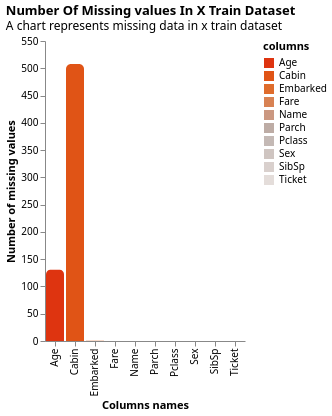

In [ ]:
plot_nan(
    train_x,
    name='x train dataset',
    only_nan=False
)

**conclusion:** X train data sample contains missing data of 21.11%(141) of Age column, 78.29%(523) of cabin column and 0.3%(2) of Embarked column are the amount of missing data in the dataset from the data size of 668.


##### Two) X validation dataset


In [ ]:
check_n_nan(valid_x)

,columns,total_nan,percent_nan
0,Age,46,20.63%
1,Cabin,179,80.27%
2,Embarked,1,0.45%


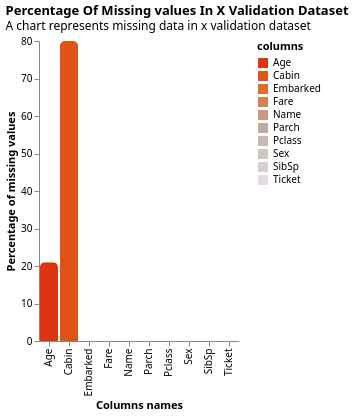

In [ ]:
plot_nan(
    valid_x,
    name='x validation dataset',
    only_nan=False,
    use_percent=True
)

**conclusion:** In X validation data sample there are 16.14%(36) of Age column and 73.54%(164) of cabin column are the amount of missing data in the dataset from the data size of 223.


#### b) Observing missing data in test dataset


In [ ]:
check_n_nan(test_df)

,columns,total_nan,percent_nan
0,Age,86,20.57%
1,Fare,1,0.24%
2,Cabin,327,78.23%


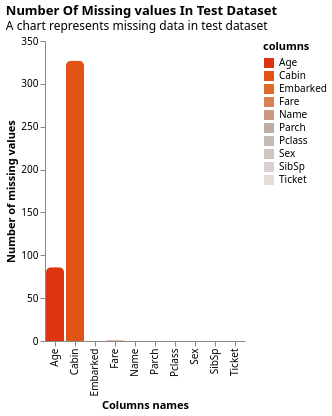

In [ ]:
plot_nan(
    test_df,
    name='test dataset',
    only_nan=False,
    use_percent=False
)

**conclusion:** The test data frame contains missing data of 20.57%(86) of Age column, 78.23%(327) of cabin column and 0.24%(1) of Fare column are the amount of missing data in the dataset from the data size of 418.


### ii) Handling the missing values (NaN)

<p>Filling missing value in the dataframes</p>


In [ ]:
class FillNaN:
    def __init__(self, dfs: List[pd.DataFrame], fill_with: Dict[str, Any]) -> None:
        self.dfs = dfs
        self.fill_with = fill_with

    @property
    def fill(self) -> List[pd.DataFrame]:
        """
        Fills missing values in the data frames.
        :return: A tuple of data frames
        """
        lst = []
        for df in self.dfs:
            for col, strat in self.fill_with.items():
                df = self.strategy(df, strat=strat, col_name=col)
            lst.append(df)
        return lst

    @staticmethod
    def strategy(df: pd.DataFrame, strat: str, col_name: str) -> pd.DataFrame:
        match strat:
            case 'mean':
                df[col_name] = df[col_name].fillna(df[col_name].mean())
            case 'mode':
                df[col_name] = df[col_name].fillna(df[col_name].mode()[0])
            case 'min':
                df[col_name] = df[col_name].fillna(df[col_name].min())
            case 'max':
                df[col_name] = df[col_name].fillna(df[col_name].max())
            case 'median':
                df[col_name] = df[col_name].fillna(df[col_name].median())
            case 'bfill':
                df[col_name] = df[col_name].bfill()
            case 'ffill':
                df[col_name] = df[col_name].ffill()
            case "drop":
                df = df.drop(col_name, axis=1)
            case _:
                raise ValueError(
                    f"Ooh, strategy has received invalid value `{strat}` for strat")
        return df

Filling the missing value in age with mean, Fare with ffill, Embarked with mode and Cabin with drop.


In [ ]:
fill = FillNaN(
    [train_x, valid_x, test_df],
    {"Age": "mean",
     "Fare": "ffill",
     "Embarked": "mode",
     "Cabin": "drop"})

In [ ]:
clean_train_x, clean_valid_x, clean_test_df = fill.fill

Check if there still any missing values in the data.


**Clean train x**


In [ ]:
check_n_nan(clean_train_x, only_nan=False)

,columns,total_nan,percent_nan
0,Pclass,0,0.0%
1,Name,0,0.0%
2,Sex,0,0.0%
3,Age,0,0.0%
4,SibSp,0,0.0%
5,Parch,0,0.0%
6,Ticket,0,0.0%
7,Fare,0,0.0%
8,Embarked,0,0.0%


**Clean valid x**


In [ ]:
check_n_nan(clean_valid_x, only_nan=False)

,columns,total_nan,percent_nan
0,Pclass,0,0.0%
1,Name,0,0.0%
2,Sex,0,0.0%
3,Age,0,0.0%
4,SibSp,0,0.0%
5,Parch,0,0.0%
6,Ticket,0,0.0%
7,Fare,0,0.0%
8,Embarked,0,0.0%


**Clean test df**


In [ ]:
check_n_nan(clean_test_df, only_nan=False)

,columns,total_nan,percent_nan
0,Pclass,0,0.0%
1,Name,0,0.0%
2,Sex,0,0.0%
3,Age,0,0.0%
4,SibSp,0,0.0%
5,Parch,0,0.0%
6,Ticket,0,0.0%
7,Fare,0,0.0%
8,Embarked,0,0.0%


### iii) Handling the categorical columns

<p>Encode categorical column to integer and drop high cardinality columns in the dataframes</p>


In [ ]:
class CategoryEncoder:
    def __init__(
            self,
            datasets: List[pd.DataFrame],
            handle_with: Dict[str, str],
    ) -> None:
        self.datasets = datasets
        self.handle_with = handle_with

    def strategy(self, df: pd.DataFrame, col: str, strat: str) -> pd.DataFrame:
        match strat:
            case 'label_encode':
                series = df[col].astype('category').cat.codes
                df[col] = series
            case 'one_hot_encode':
                data = pd.get_dummies(
                    df[col],
                    columns=list(df[col].unique())
                ).astype(int)
                df = pd.concat([df, data], axis=1)
                df = df.drop(col, axis=1)
            case 'drop':
                df = df.drop(col, axis=1)
            case _:
                raise ValueError()

        return df

    def encode(self) -> List[pd.DataFrame]:
        """
        Encode categorical columns to integer.
        :return: A tuple of data frames
        """

        datasets = []

        for dataset in self.datasets:
            for col, strat in self.handle_with.items():
                dataset = self.strategy(dataset, col, strat)
            datasets.append(dataset)

        return datasets

In [ ]:
# First five rows from the clean train x.
clean_train_x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
675,2,"Watson, Mr. Ennis Hastings",male,29.036629,0,0,239856,0.000,S
370,1,"Aubart, Mme. Leontine Pauline",female,24.000000,0,0,PC 17477,69.300,C
701,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.000000,1,0,PC 17757,227.525,C
124,2,"Webber, Miss. Susan",female,32.500000,0,0,27267,13.000,S
324,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.000000,1,1,248738,29.000,S


In [ ]:
# Exclude the int and float from the data.
cat_df = clean_train_x.select_dtypes(exclude=[int, float])
cat_df.head()

,Name,Sex,Ticket,Embarked
PassengerId,,,,
675,"Watson, Mr. Ennis Hastings",male,239856,S
370,"Aubart, Mme. Leontine Pauline",female,PC 17477,C
701,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,PC 17757,C
124,"Webber, Miss. Susan",female,27267,S
324,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,248738,S


In [ ]:
# Fetch the categorical columns.
cat_columns = list(cat_df.columns)
cat_columns

['Name', 'Sex', 'Ticket', 'Embarked']

Check for columns with high cardinality column in the data.


In [ ]:
clean_train_x[cat_columns].nunique()

Name        668
Sex           2
Ticket      537
Embarked      3
dtype: int64

In [ ]:
# Instantiate the CategoryEncoder
encoder = CategoryEncoder(
    [clean_train_x, clean_valid_x, clean_test_df],
    {
        "Sex": "label_encode",
        "Embarked": "one_hot_encode",
        "Name": "drop",
        "Ticket": "drop"
    }
)

# Encode the column
num_train_x, num_valid_x, num_test_df = encoder.encode()

In [ ]:
num_train_x.dtypes

Pclass      int64
Sex          int8
Age       float64
SibSp       int64
Parch       int64
Fare      float64
C           int64
Q           int64
S           int64
dtype: object

## 7) **Data visualisation**

<p>Represeting the data in graphical way like making chart</p>


In [ ]:
visual_df = pd.concat([clean_train_x, clean_valid_x])
visual_df['Survived'] = np.concatenate([train_y, valid_y])
visual_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
PassengerId,,,,,,,,,,
675,2,"Watson, Mr. Ennis Hastings",1,29.036629,0,0,239856,0.000,S,0
370,1,"Aubart, Mme. Leontine Pauline",0,24.000000,0,0,PC 17477,69.300,C,1
701,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",0,18.000000,1,0,PC 17757,227.525,C,1
124,2,"Webber, Miss. Susan",0,32.500000,0,0,27267,13.000,S,1
324,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",0,22.000000,1,1,248738,29.000,S,1


In [ ]:
alt.renderers.enable("html")


class Graph:
    def __init__(
        self, data: pd.DataFrame, map_values: Optional[Dict[str, Dict[str, Any]]] = None
    ) -> None:
        data = data.copy()

        if map_values:
            for key, value in map_values.items():
                data[key] = data[key].map(lambda col: value[col])

        self.__data = data

    def setting_colors(
        self, x: str, color: List[str] | str
    ) -> Tuple[pd.DataFrame, alt.Color]:

        # Color map.
        if isinstance(color, list):
            alt_color = (
                alt.Color(x).scale(range=color, reverse=True).legend(orient="right")
            )
        else:
            alt_color = (
                alt.Color(x).scale(scheme=color, reverse=True).legend(orient="right")
            )
        return alt_color

    def col_bar_char(
        self,
        x_column: str,
        group_by: str,
        color: List | str = "paired",
        width: int = 200,
        height: int = 200,
        title: Optional[str] = None,
        subtitle: Optional[str] = None,
        x_title: str | None = None,
        y_title: str | None = None,
    ):
        alt_color = self.setting_colors(x_column, color=color)

        data = self.__data

        x_title = x_title.title() if x_title else x_column.title()
        y_title = y_title.title() if y_title else "Number of Passengers"

        source = data.groupby(group_by)[x_column].value_counts().reset_index()

        grouped_bars = (
            alt.Chart(source)
            .mark_bar(cornerRadius=10)
            .encode(
                x=alt.X(x_column, title=x_title),
                y=alt.Y("count:Q", title=y_title),
                color=alt_color,
                column=group_by,
            )
            .encode(
                tooltip=[
                    alt.Tooltip(x_column, title=x_title),
                    alt.Tooltip("count", title=y_title),
                ],
            )
            .properties(
                width=width,
                height=height,
                title=alt.Title(
                    title if title else "",
                    fontSize=18,
                    subtitle=subtitle if subtitle else "",
                    subtitleFontSize=12,
                    # dy=-10,
                ),
            )
        )

        return grouped_bars

    def bar_chart(
        self,
        x_column: str,
        color: List | str = "paired",
        width: int = 200,
        height: int = 200,
        title: Optional[str] = None,
        subtitle: Optional[str] = None,
        x_title: str | None = None,
        y_title: str | None = None,
    ) -> alt.ChartDataType:  # Make copy then change column data to str

        alt_color = self.setting_colors(x_column, color=color)

        data = self.__data

        x_title = x_title.title() if x_title else x_column.title()
        y_title = y_title.title() if y_title else "Number of Passengers"

        # Return the alt chart
        bar_layer = (
            alt.Chart(data)
            .mark_bar(cornerRadius=10)
            .encode(
                x=alt.X(
                    x_column,
                    title=x_title,
                    axis=alt.Axis(grid=False, labelFontWeight="bold"),
                ),
                y=alt.Y(
                    "count()",
                    title=y_title,
                    axis=alt.Axis(grid=False, labelFontWeight="bold"),
                ),
                color=alt_color.legend(orient="right"),
                tooltip=[
                    alt.Tooltip(x_column, title=x_title),
                    alt.Tooltip("count()", title=y_title),
                ],
            )
            .properties(
                width=width,
                height=height,
                title=alt.Title(
                    title if title else "",
                    fontSize=18,
                    subtitle=subtitle if subtitle else "",
                    subtitleFontSize=12,
                    # dy=-10,
                ),
            )
        )

        text_layer = (
            alt.Chart(data)
            .mark_text(
                align="center",
                baseline="bottom",  # Align text to the bottom of its bounding box
                dy=-5,  # Adjust vertical position (negative for above the bar)
                fontSize=12,
                fontWeight="bold",
            )
            .encode(x=x_column, y="count()", text=alt.Text("count()"))
        )

        return bar_layer + text_layer  # .configure_view(

    def donut_chart(
        self,
        x: str,
        inner_radius: int = 50,
        color: List | str = "paired",
        width: int = 200,
        height: int = 200,
    ) -> alt.ChartDataType:

        data = self.__data

        value_counts = data[x].value_counts().reset_index()
        value_counts["count"] = (value_counts["count"] / data.shape[0]).round(3)

        donut_chart = (
            alt.Chart(value_counts)
            .mark_arc(innerRadius=inner_radius)
            .encode(
                theta="count",
                color=f"{x}:N",
                tooltip=[
                    alt.Tooltip(f"{x}".title()),
                    alt.Tooltip("count", title="Percentage"),
                ],
            )
            .properties(
                width=width,
                height=height,
            )
        )
        return donut_chart

    def scatter_chart(
        self,
        x: str,
        y: str,
        color_with: Optional[str] = None,
        width: int = 300,
        height: int = 300,
        title: Optional[str] = None,
        subtitle: Optional[str] = None,
        color: List[str] | str = "dark2",
    ):
        alt_color = None

        if color_with:
            alt_color = self.setting_colors(color_with, color=color)

        tooltips = (
            [alt.Tooltip(x), alt.Tooltip(y), alt.Tooltip(color_with)]
            if color_with
            else [alt.Tooltip(x), alt.Tooltip(y)]
        )

        encode_param = (
            dict(x="%s:Q" % x, y="%s:Q" % y, color=alt_color, tooltip=tooltips)
            if color_with
            else dict(x="%s:Q" % x, y="%s:Q" % y, tooltip=tooltips)
        )

        data = self.__data

        # Scatter Plot
        points = (
            alt.Chart(data)
            .mark_point()
            .encode(**encode_param)
            .properties(
                width=width,
                height=height,
                title=alt.Title(
                    title if title else "",
                    fontSize=18,
                    subtitle=subtitle if subtitle else "",
                    subtitleFontSize=12,
                ),
            )
        )

        points = points.configure_view(stroke=None)

        return points

    def concat(
        self,
        *args,
        use: Literal["vconcat", "hconcat"] = "vconcat",
        show_stroke: bool = False,
    ):
        if use == "vconcat":
            if show_stroke:
                return alt.vconcat(*args)
            return alt.vconcat(*args).configure_view(stroke=None)
        elif use == "hconcat":
            if show_stroke:
                return alt.hconcat(*args)
            return alt.hconcat(*args).configure_view(stroke=None)
        else:
            raise ValueError("Received invalid value `%s`" % use)


graph = Graph(
    visual_df,
    map_values={
        "Sex": {0: "Female (0)", 1: "Male (1)"},
        "Survived": {0: "Didn't survive", 1: "survived"},
    },
)
graph.bar_chart("Embarked")
donut = graph.donut_chart("Embarked")
col_bar = graph.scatter_chart(
    "Age", "Fare", color_with="Survived", color=["red", "blue"]
)
col_bar

# hconcat = graph.concat(bar, donut, use="hconcat", show_stroke=True)
# graph.concat(hconcat, col_bar, use="vconcat")
# col_bar

alt.Chart(...)

In [ ]:
x = clean_train_x['Embarked'].value_counts().reset_index()
x["count"] = (x["count"] / clean_train_x.shape[0]).round(3)